In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from utils import *


# Define relevant paths
folder_path     = "low_grav"

# List all files in the folder
files = os.listdir(folder_path)

# Create a dictionary to store the dataframes
ntrt_dataframes = {}

# Loop through the files and read them into dataframes
for file in files:
    file_path           = os.path.join(folder_path, file)
    df_name             = file.split('.')[0]
    ntrt_dataframes[df_name] = pd.read_csv(file_path, skiprows=1)

# Display the names of the dataframes
ntrt_dataframes.keys()

dict_keys(['vert_moon_grav', 'dir_moon_grav', 'vert_earth_grav', 'dir_earth_grav', 'vert_mars_grav', 'dir_mars_grav'])

In [55]:
# Consider only restults after the jump occurs to ignore settling motion
release_index      = 1000

# For vert jumps
# earth_impact_index = 1080
# mars_impact_index  = 1230
# moon_impact_index  = 1395

# For dir jumps
earth_impact_index = 1043
mars_impact_index  = 1130
moon_impact_index  = 1292

# Compute centroid to estimate CoM position
avg_pos_dataframes = {}
for name, df in ntrt_dataframes.items():
    avg_pos_dataframes[name]         = extract_position_data(df)
    avg_pos_dataframes[name]['dist'] = np.sqrt(avg_pos_dataframes[name]['avg_x']**2 + avg_pos_dataframes[name]['avg_z']**2) 

    if 'earth' in name:
        impact_index = earth_impact_index
    elif 'mars' in name:
        impact_index = mars_impact_index
    elif 'moon' in name:
        impact_index = moon_impact_index
    
    avg_pos_dataframes[name] = avg_pos_dataframes[name].iloc[release_index:impact_index].reset_index(drop=True)


vert_moon_grav: max avg_y = 3.65, max dist = 0.35
vert_mars_grav: max avg_y = 2.84, max dist = 0.22
vert_earth_grav: max avg_y = 1.22, max dist = 0.06


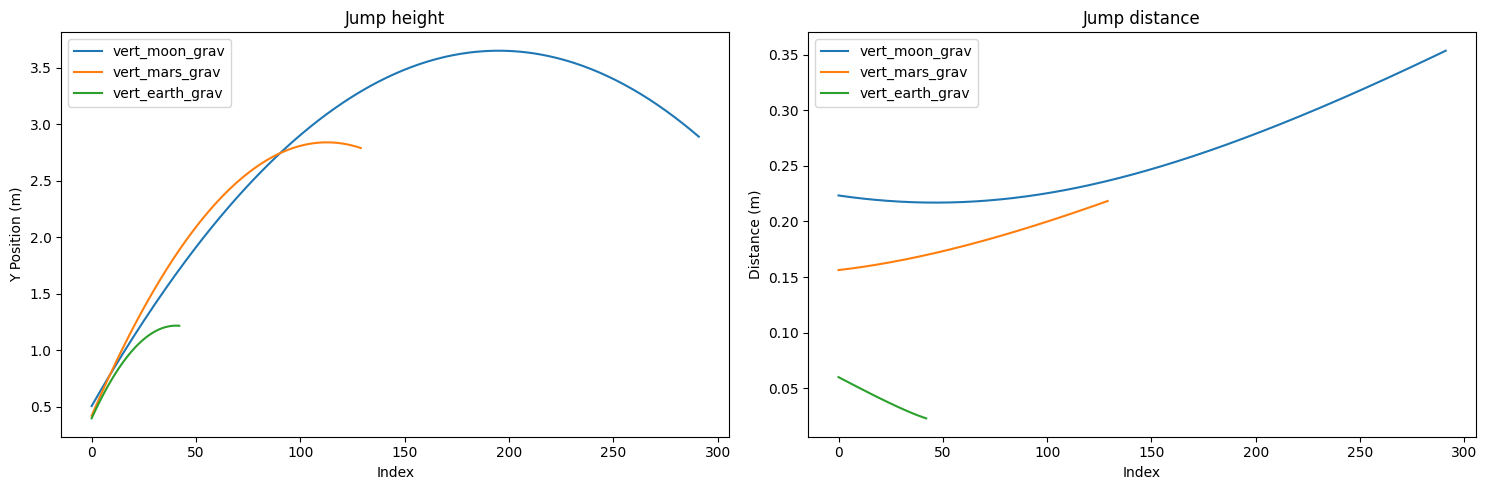

dir_moon_grav: max avg_y = 2.18, max dist = 1.56
dir_mars_grav: max avg_y = 1.17, max dist = 0.86
dir_earth_grav: max avg_y = 0.64, max dist = 0.35


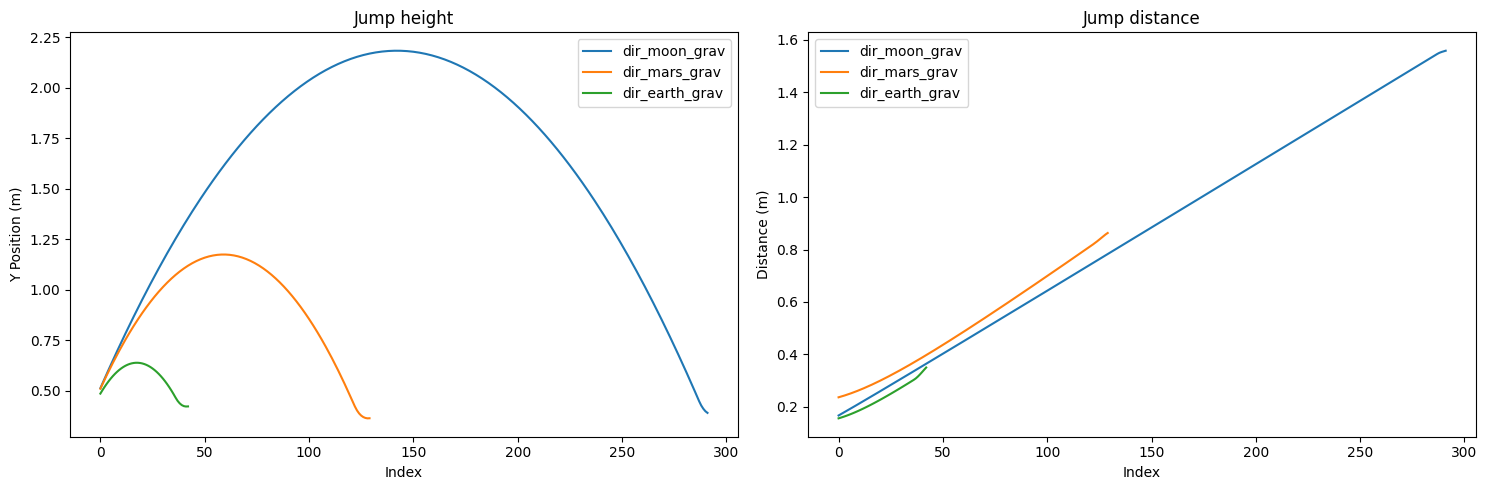

In [56]:
def plot_avg_positions(dataframes):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    for name, df in dataframes.items():
        max_avg_y = round(df['avg_y'].max(), 2)
        max_dist = round(df['dist'].max(), 2)
        print(f"{name}: max avg_y = {max_avg_y}, max dist = {max_dist}")
        axs[0].plot(df['avg_y'], label=name)
        axs[0].set_title('Jump height')
        axs[0].set_xlabel('Index')
        axs[0].set_ylabel('Y Position (m)')

        axs[1].plot(df['dist'], label=name)
        axs[1].set_title('Jump distance')
        axs[1].set_xlabel('Index')
        axs[1].set_ylabel('Distance (m)')
    
    for ax in axs:
        ax.legend()
    
    plt.tight_layout()
    plt.show()


plot_avg_positions({
    'vert_moon_grav': avg_pos_dataframes['vert_moon_grav'],
    'vert_mars_grav': avg_pos_dataframes['vert_mars_grav'],
    'vert_earth_grav': avg_pos_dataframes['vert_earth_grav'],
})

plot_avg_positions({
    'dir_moon_grav': avg_pos_dataframes['dir_moon_grav'],
    'dir_mars_grav': avg_pos_dataframes['dir_mars_grav'],
    'dir_earth_grav': avg_pos_dataframes['dir_earth_grav'],
})
